# Exercise 3: Exploring Disparities in Access to Employment Opportunities

### Julian Ornelas

Instructions
1. Using the DataStore for geosnap at /srv/data/geonsap extract census
tract data for San Diego using the ACS 2021 dataset.


In [1]:
import os

os.environ['PROJ_LIB'] = '/opt/tljh/user/share/proj'

from geosnap import DataStore
from geosnap import io as gio
from geosnap.io import get_lodes
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
datasets = DataStore('/srv/data/geosnap')

In [3]:
sdc_df = gio.get_acs(datasets, years=[2021], county_fips="06073", level='tract')

In [4]:
sdc_df.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
0,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,1.623816,0.304465,0.000000,1.082544,0.00000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",2021
1,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,6.323084,2.771763,0.000000,4.677350,0.00000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",2021
2,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,4.217016,0.000000,0.123305,3.699137,0.00000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",2021
3,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,17.155556,0.622222,2.444444,16.311111,0.00000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",2021
4,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,7.102672,1.265823,0.000000,4.887482,2.21519,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",2021


In [5]:
sdc_df.shape

(737, 158)

<Axes: >

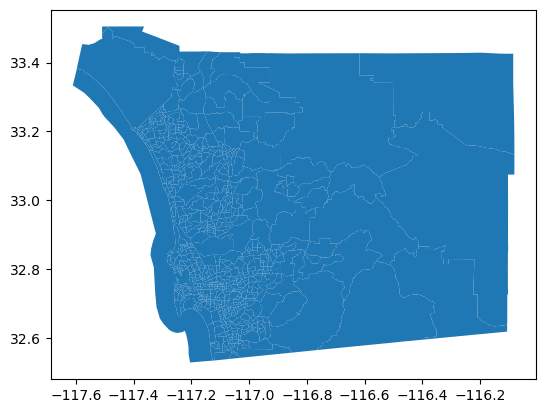

In [6]:
sdc_df.plot()

In [7]:
sdc_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

2. Prepare choropleth maps using deciles for the variables: p_nonhisp_black_persons,
p_hispanic_persons, p_nonhisp_white_persons, per_capita_income,
n_total_pop. Provide an interpretation of the spatial patterns for each
variable.


In [8]:
columns_to_plot = [
    'p_nonhisp_black_persons',
    'p_hispanic_persons',
    'p_nonhisp_white_persons',
    'per_capita_income',
    'n_total_pop'
]

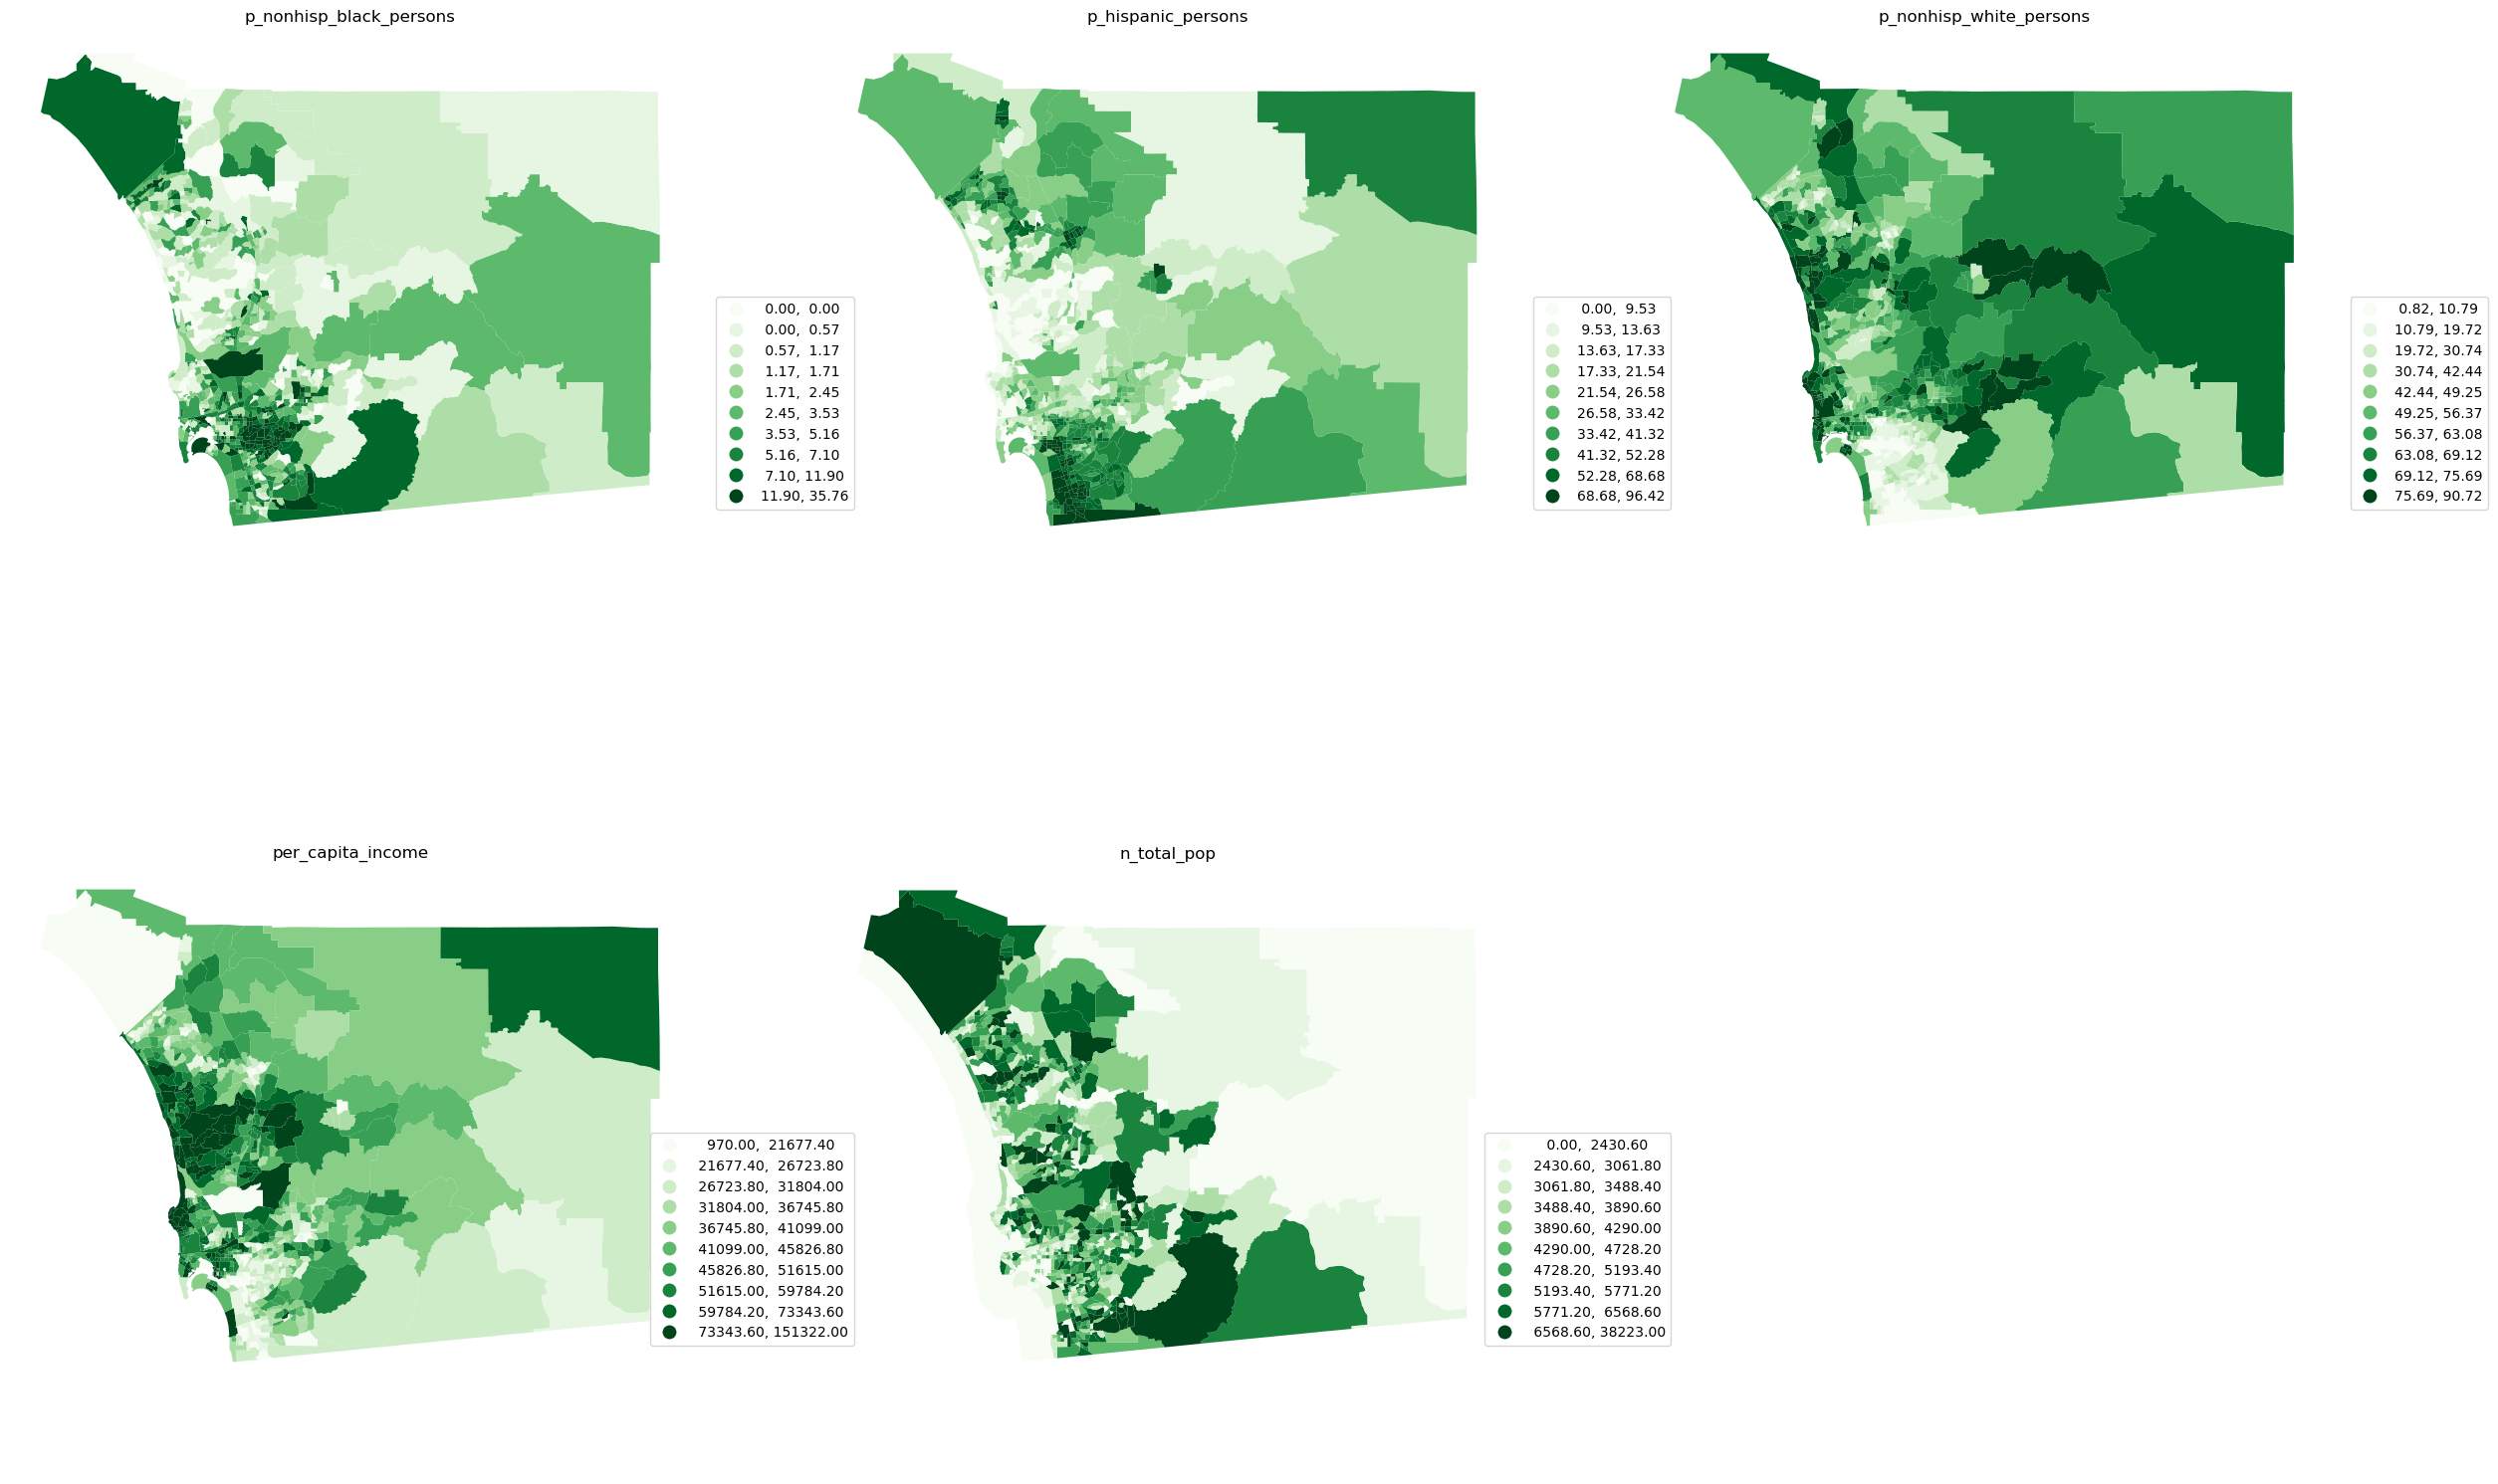

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    sdc_df.plot(column=col, ax=ax, scheme='Quantiles', k=10, cmap='Greens', legend=True, legend_kwds={"fmt": "{:.2f}", "bbox_to_anchor": (1.25, 0.5)})
    ax.set_axis_off()
    ax.set_title(col)
ax = axs[i+1]
ax.set_axis_off()
plt.show()

For per_capita_income, it is easy to identify the richest (dark-green) parts of the county: La Jolla, Poway, Del Mar, Rancho Santa Fe, and some of the north-county cities like Carlsbad and Encinitas.  Some of those areas correspond to a higher percentage of nonhisp_white_persons, particularly the coastal and beach communites/cities.  There are higher percentages of hispanic_persons in the southwest part of the county, places like National City and Chula Vista, which are close to Tijuana.  There is a higher concentration of nonhisp_black_persons due east of downtown, as well as in the military bases/stations: Camp Pendleton, Coronado North Island, and Miramar.

3. Using the get_lodes function, create a geodataframe for the lodes dataset
for San Diego County in 2021.


In [10]:
sd_lodes = get_lodes(datasets, county_fips='06073', years=[2021])
sd_lodes.head()

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
0,060730001001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293,18.0
1,060730001001001,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,NaN
2,060730001001002,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,5.0
3,060730001001003,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1.0
4,060730001001004,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN


<Axes: >

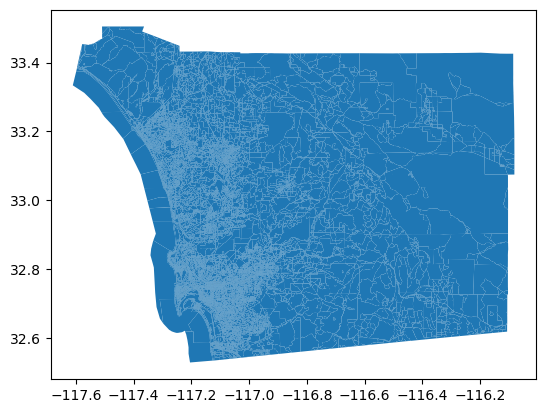

In [11]:
sd_lodes.plot()

In [12]:
sd_lodes.shape

(28633, 59)

4. Plot the total_employees variable using quantiles.


In [13]:
sd_lodes.dropna(axis=0, inplace=True)

In [14]:
sd_lodes.head()

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
0,060730001001000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,293,18.0
2,060730001001002,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,5.0
3,060730001001003,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1.0
5,060730001001005,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,3.0
10,060730001001010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,12,6.0


<Axes: >

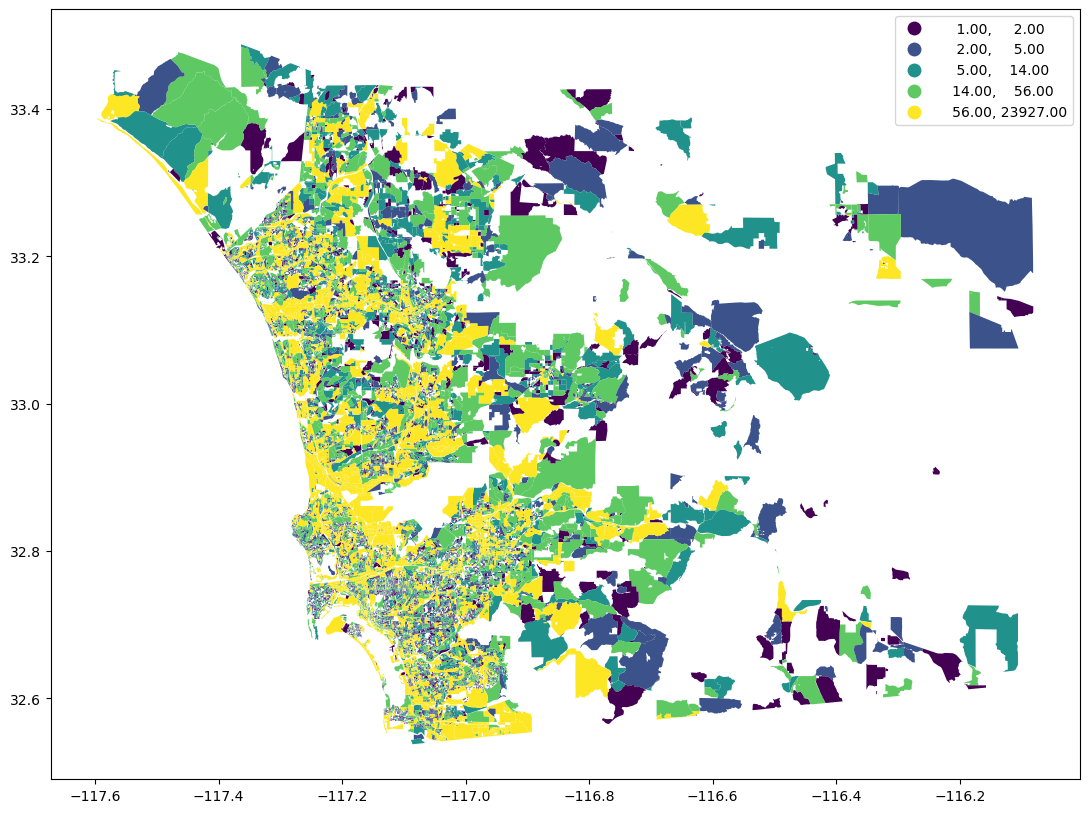

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sd_lodes.plot(column='total_employees', ax=axs, scheme='Quantiles', legend=True)

5. Identify employment centers as those locations in the lodes geodataframe
with greater than 4,000 total employees.


In [16]:
employ_centers = sd_lodes[sd_lodes['total_employees'] > 4000] #NAICS
employ_centers.head()

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_55,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees
214,060730004002000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,68.0,0.0,9820.0,0.0,0.0,18.0,0.0,121,9995.0
229,060730004004000,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,4177.0,0.0,0.0,0.0,0.0,1019,4272.0
1604,060730028011010,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,23.0,3343.0,0.0,0.0,35.0,568.0,0.0,27,4007.0
3062,060730038001018,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984,4148.0
3859,060730053021009,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,42.0,2.0,26.0,82.0,2.0,11185.0,48,12455.0


In [17]:
employ_centers.shape

(31, 59)

<Axes: >

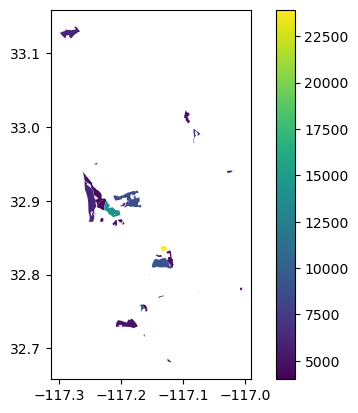

In [18]:
employ_centers.plot(column='total_employees', legend=True)

In [19]:
#employ_centers.explore(tooltip=['total_employees'])

6. Using the pedestrian network for San Diego County create isochrones with
a distance of 3000 meters around the employment centers.


In [20]:
import os
import pandana as pdna
if not os.path.exists('41740.h5'):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", "./41740.h5")
sd_network = pdna.Network.from_hdf5("41740.h5")

Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [21]:
from geosnap.analyze import isochrones_from_gdf

iso = isochrones_from_gdf(employ_centers, threshold=3000, network=sd_network)
#iso.explore()

7. Define a new set of geometries as the union of the isochrones and the ACS
census tracts.


In [22]:
iso.head()

,geometry,distance
origin,,
214,"POLYGON ((-117.15635 32.73704, -117.15682 32.7...",3000
229,"POLYGON ((-117.16991 32.73714, -117.17043 32.7...",3000
1604,"POLYGON ((-117.07823 32.77758, -117.07771 32.7...",3000
3062,"POLYGON ((-117.12684 32.68246, -117.12764 32.6...",3000
3859,"POLYGON ((-117.17343 32.71976, -117.17331 32.7...",3000


In [23]:
sdc_df.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_russian_pop,n_italian_pop,n_german_pop,n_irish_pop,n_scandaniavian_pop,n_foreign_born_pop,...,p_poverty_rate,p_poverty_rate_over_65,p_poverty_rate_children,p_poverty_rate_white,p_poverty_rate_black,p_poverty_rate_hispanic,p_poverty_rate_native,p_poverty_rate_asian,geometry,year
0,06073000100,228.0,0.0,21.0,45.0,117.0,34.0,35.0,0.0,277.0,...,1.623816,0.304465,0.000000,1.082544,0.00000,1.116373,0.0,0.0,"MULTIPOLYGON (((-117.19490 32.75278, -117.1947...",2021
1,06073000201,40.0,11.0,0.0,13.0,101.0,65.0,112.0,0.0,216.0,...,6.323084,2.771763,0.000000,4.677350,0.00000,0.909485,0.0,0.0,"MULTIPOLYGON (((-117.17887 32.75765, -117.1779...",2021
2,06073000202,431.0,0.0,59.0,78.0,233.0,150.0,66.0,0.0,879.0,...,4.217016,0.000000,0.123305,3.699137,0.00000,1.331689,0.0,0.0,"MULTIPOLYGON (((-117.18404 32.74571, -117.1838...",2021
3,06073000301,396.0,0.0,19.0,0.0,21.0,83.0,53.0,0.0,439.0,...,17.155556,0.622222,2.444444,16.311111,0.00000,4.888889,0.0,0.0,"MULTIPOLYGON (((-117.16864 32.74897, -117.1684...",2021
4,06073000302,526.0,0.0,66.0,13.0,70.0,121.0,132.0,0.0,199.0,...,7.102672,1.265823,0.000000,4.887482,2.21519,3.059072,0.0,0.0,"MULTIPOLYGON (((-117.16400 32.74091, -117.1640...",2021


In [24]:
sdc_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [25]:
iso.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
sdc_df.to_crs(iso.crs, inplace=True)

In [27]:
iso_dissolve = iso.dissolve()

In [28]:
iso_dissolve['in_iso'] = 'in_iso'

In [29]:
iso_dissolve.head()

,geometry,distance,in_iso
0,"MULTIPOLYGON (((-117.19754 32.73209, -117.1945...",3000,in_iso


<Axes: >

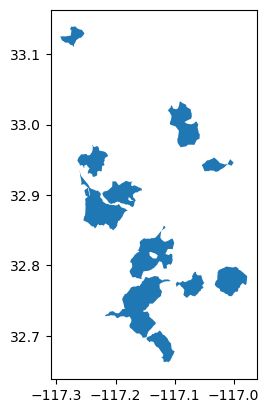

In [30]:
iso_dissolve.plot()

In [31]:
#iso_dissolve.explore()

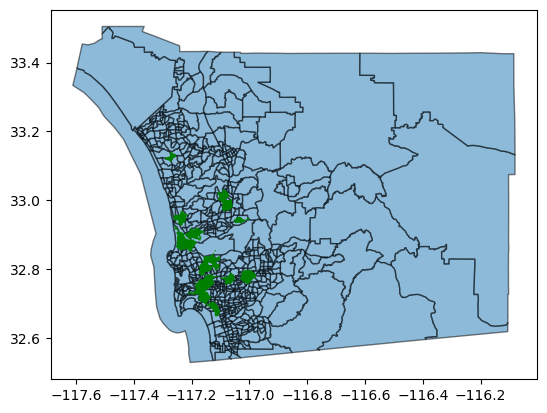

In [32]:
base = sdc_df.plot(edgecolor='k', alpha=0.5)
iso_dissolve.plot(ax=base, color='g')
plt.show()

In [33]:
interm = sdc_df[['geometry']].overlay(iso_dissolve, "union")

In [34]:
interm.shape

(883, 3)

In [35]:
interm.head(10)

,distance,in_iso,geometry
0,3000.0,in_iso,"POLYGON ((-117.18096 32.75800, -117.18047 32.7..."
1,3000.0,in_iso,"POLYGON ((-117.17797 32.75765, -117.17706 32.7..."
2,3000.0,in_iso,"POLYGON ((-117.18383 32.74608, -117.18376 32.7..."
3,3000.0,in_iso,"POLYGON ((-117.16840 32.74897, -117.16768 32.7..."
4,3000.0,in_iso,"POLYGON ((-117.16400 32.74132, -117.16400 32.7..."
5,3000.0,in_iso,"POLYGON ((-117.17019 32.75878, -117.16816 32.7..."
6,3000.0,in_iso,"POLYGON ((-117.16149 32.75893, -117.16147 32.7..."
7,3000.0,in_iso,"POLYGON ((-117.16077 32.75828, -117.16068 32.7..."
8,3000.0,in_iso,"POLYGON ((-117.15661 32.74136, -117.15660 32.7..."
9,3000.0,in_iso,"POLYGON ((-117.14635 32.74652, -117.14632 32.7..."


In [36]:
interm.tail(10)

,distance,in_iso,geometry
873,NaN,NaN,"POLYGON ((-117.21678 32.94566, -117.21662 32.9..."
874,NaN,NaN,"MULTIPOLYGON (((-117.21430 32.94393, -117.2142..."
875,NaN,NaN,"MULTIPOLYGON (((-117.19476 32.68434, -117.1941..."
876,NaN,NaN,"MULTIPOLYGON (((-117.19351 32.68665, -117.1930..."
877,NaN,NaN,"POLYGON ((-117.13542 32.67861, -117.13496 32.6..."
878,NaN,NaN,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916..."
879,NaN,NaN,"POLYGON ((-117.33365 33.14436, -117.33346 33.1..."
880,NaN,NaN,"POLYGON ((-117.30198 33.12217, -117.30197 33.1..."
881,NaN,NaN,"MULTIPOLYGON (((-117.61104 33.33412, -117.6086..."
882,3000.0,in_iso,"MULTIPOLYGON (((-117.12893 32.80187, -117.1289..."


8. Using tobler, interpolate the variables from step 2 into the new geometries
from step 7.


In [37]:
import tobler

In [38]:
columns_to_plot

['p_nonhisp_black_persons',
 'p_hispanic_persons',
 'p_nonhisp_white_persons',
 'per_capita_income',
 'n_total_pop']

In [39]:
estimates = tobler.area_weighted.area_interpolate(
    source_df=sdc_df, 
    target_df=interm, 
    intensive_variables=columns_to_plot[:-1],
    extensive_variables=[columns_to_plot[-1]]
)

In [40]:
estimates

,n_total_pop,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,per_capita_income,geometry
0,1.856567e+03,0.000000,14.445196,77.604871,96996.000000,"POLYGON ((-117.18096 32.75800, -117.18047 32.7..."
1,2.309000e+03,0.389779,5.326981,82.503243,100046.994037,"POLYGON ((-117.17797 32.75765, -117.17706 32.7..."
2,4.116000e+03,0.485909,17.322643,71.865889,66060.000000,"POLYGON ((-117.18383 32.74608, -117.18376 32.7..."
3,2.250000e+03,2.311111,19.288888,65.111107,74563.995556,"POLYGON ((-117.16840 32.74897, -117.16768 32.7..."
4,3.042000e+03,1.873767,21.071663,73.668639,66441.000000,"POLYGON ((-117.16400 32.74132, -117.16400 32.7..."
...,...,...,...,...,...,...
878,4.504000e+03,2.220249,49.489343,11.967140,22792.000000,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916..."
879,2.020436e+03,1.535088,2.368421,74.035088,84971.000000,"POLYGON ((-117.33365 33.14436, -117.33346 33.1..."
880,5.582343e+03,4.153673,33.216914,47.698640,60590.000000,"POLYGON ((-117.30198 33.12217, -117.30197 33.1..."
881,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-117.61104 33.33412, -117.6086..."


In [41]:
estimates['in_iso'] = interm['in_iso']
estimates.head(10)

,n_total_pop,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,per_capita_income,geometry,in_iso
0,1856.566630,0.000000,14.445196,77.604871,96996.000000,"POLYGON ((-117.18096 32.75800, -117.18047 32.7...",in_iso
1,2308.999862,0.389779,5.326981,82.503243,100046.994037,"POLYGON ((-117.17797 32.75765, -117.17706 32.7...",in_iso
2,4116.000000,0.485909,17.322643,71.865889,66060.000000,"POLYGON ((-117.18383 32.74608, -117.18376 32.7...",in_iso
3,2249.999866,2.311111,19.288888,65.111107,74563.995556,"POLYGON ((-117.16840 32.74897, -117.16768 32.7...",in_iso
4,3042.000000,1.873767,21.071663,73.668639,66441.000000,"POLYGON ((-117.16400 32.74132, -117.16400 32.7...",in_iso
5,3607.000000,4.657610,21.264208,56.057666,61583.000000,"POLYGON ((-117.17019 32.75878, -117.16816 32.7...",in_iso
6,3044.999819,0.426929,20.065680,71.461408,77108.995404,"POLYGON ((-117.16149 32.75893, -117.16147 32.7...",in_iso
7,3196.000000,7.102628,19.242804,61.483104,60399.000000,"POLYGON ((-117.16077 32.75828, -117.16068 32.7...",in_iso
8,4342.000000,2.441271,16.628282,67.825887,58698.000000,"POLYGON ((-117.15661 32.74136, -117.15660 32.7...",in_iso
9,3036.719238,5.774379,22.390057,64.646272,54439.000000,"POLYGON ((-117.14635 32.74652, -117.14632 32.7...",in_iso


In [42]:
estimates.tail(10)

,n_total_pop,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,per_capita_income,geometry,in_iso
873,3.803375e+03,0.000000,5.979544,50.904799,93803.000000,"POLYGON ((-117.21678 32.94566, -117.21662 32.9...",NaN
874,8.945000e+03,0.581330,9.122415,45.656792,66638.000000,"MULTIPOLYGON (((-117.21430 32.94393, -117.2142...",NaN
875,2.879000e+03,4.376520,32.268149,55.296978,41758.000000,"MULTIPOLYGON (((-117.19476 32.68434, -117.1941...",NaN
876,2.017000e+03,1.636093,9.667824,82.548339,104448.000000,"MULTIPOLYGON (((-117.19351 32.68665, -117.1930...",NaN
877,2.603622e+03,5.777778,68.333333,14.944444,22175.000000,"POLYGON ((-117.13542 32.67861, -117.13496 32.6...",NaN
878,4.504000e+03,2.220249,49.489343,11.967140,22792.000000,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916...",NaN
879,2.020436e+03,1.535088,2.368421,74.035088,84971.000000,"POLYGON ((-117.33365 33.14436, -117.33346 33.1...",NaN
880,5.582343e+03,4.153673,33.216914,47.698640,60590.000000,"POLYGON ((-117.30198 33.12217, -117.30197 33.1...",NaN
881,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-117.61104 33.33412, -117.6086...",NaN
882,1.152127e-10,3.325051,15.043311,47.682625,54829.582546,"MULTIPOLYGON (((-117.12893 32.80187, -117.1289...",in_iso


In [43]:
estimates['in_iso'] = estimates['in_iso'].fillna("not_in_iso")

In [44]:
estimates.tail(10)

,n_total_pop,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,per_capita_income,geometry,in_iso
873,3.803375e+03,0.000000,5.979544,50.904799,93803.000000,"POLYGON ((-117.21678 32.94566, -117.21662 32.9...",not_in_iso
874,8.945000e+03,0.581330,9.122415,45.656792,66638.000000,"MULTIPOLYGON (((-117.21430 32.94393, -117.2142...",not_in_iso
875,2.879000e+03,4.376520,32.268149,55.296978,41758.000000,"MULTIPOLYGON (((-117.19476 32.68434, -117.1941...",not_in_iso
876,2.017000e+03,1.636093,9.667824,82.548339,104448.000000,"MULTIPOLYGON (((-117.19351 32.68665, -117.1930...",not_in_iso
877,2.603622e+03,5.777778,68.333333,14.944444,22175.000000,"POLYGON ((-117.13542 32.67861, -117.13496 32.6...",not_in_iso
878,4.504000e+03,2.220249,49.489343,11.967140,22792.000000,"MULTIPOLYGON (((-117.09190 32.68388, -117.0916...",not_in_iso
879,2.020436e+03,1.535088,2.368421,74.035088,84971.000000,"POLYGON ((-117.33365 33.14436, -117.33346 33.1...",not_in_iso
880,5.582343e+03,4.153673,33.216914,47.698640,60590.000000,"POLYGON ((-117.30198 33.12217, -117.30197 33.1...",not_in_iso
881,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-117.61104 33.33412, -117.6086...",not_in_iso
882,1.152127e-10,3.325051,15.043311,47.682625,54829.582546,"MULTIPOLYGON (((-117.12893 32.80187, -117.1289...",in_iso


Verify that the population total remains the same from the interpolations and the county tracts df.

In [45]:
estimates.n_total_pop.sum()

3296316.9762659827

In [46]:
sdc_df.n_total_pop.sum()

3296317.0

9. Report the difference in the values of the interpolated values between those
areas within the 3000 meters of the employment centers, and those outside
that distance. Provide an interpretation of your findings.

In [47]:
estimates[['p_nonhisp_black_persons', 'p_hispanic_persons', 'p_nonhisp_white_persons', 'per_capita_income', 'in_iso']].\
        groupby(by='in_iso').mean()

,p_nonhisp_black_persons,p_hispanic_persons,p_nonhisp_white_persons,per_capita_income
in_iso,,,,
in_iso,4.911866,24.454959,50.050678,51028.339345
not_in_iso,4.298248,33.567236,45.602648,43821.664792


In [48]:
import pandas as pd

pd.options.display.float_format = '{:.0f}'.format
estimates[['n_total_pop', 'in_iso']].groupby(by='in_iso').sum()

,n_total_pop
in_iso,
in_iso,378071
not_in_iso,2918246


### Interpretation

Based on the results of the tobler interpolations, there are some small yet noticeable differences in the percentages of groups that live within versus outside the employment centers.  On average, a greater percentage of Hispanic persons live outside the employment centers, almost 10 percent higher.  There are slightly more black persons living within the employment centers, but the percentages are very low compared to Hispanic and white persons. The income level is also higher for those living within the employment centers than outside, by almost $8,000 on average.  Given the locations of some of the employment centers in the county - such as Carlsbad, Poway, Del Mar, and parts of La Mesa and El Cajon - it makes sense that the per-capita income is higher because those are some of the more affluent parts of the county.  Lastly, there is a very large difference in the population totals.  Almost 8 times as many people live outside the employment centers.  This is not surprising given how small the employment centers are compared to the vast size of the county.